In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.preprocessing import label_binarize

In [53]:
#load the dataset
data = pd.read_csv("/home/shrestha.jar/letters.csv")

print(data.head(3))

   label  pixel43  pixel44  pixel92  pixel124  pixel125  pixel126  pixel127  \
0      1        0        0        0         0         0         0         0   
1      0        0        0        0       137       137       192        86   
2      1        0        0        0         3       141       139         3   

   pixel128  pixel129  ...  pixel329  pixel351  pixel410  pixel411  pixel412  \
0         0         0  ...         0       254         0         0         0   
1        72         1  ...       254         0         0        75       254   
2         0         0  ...         0       184         0         0         0   

   pixel413  pixel414  pixel415  pixel416  pixel417  
0         0         0         0         0         0  
1       254       254        17         0         0  
2         0         0         0         0         0  

[3 rows x 46 columns]


In [54]:
# Check the shape of the dataset
print(f"Dataset shape: {data.shape}")

Dataset shape: (42000, 46)


#### KNN Model

In [55]:
# Separate features and target variable
X = data.drop('label', axis=1)
y = data['label']  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
# Normalize the data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=8)  
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       827
           1       0.76      0.96      0.85       937
           2       0.66      0.63      0.65       835
           3       0.56      0.57      0.56       870
           4       0.67      0.51      0.58       814
           5       0.66      0.55      0.60       759
           6       0.86      0.88      0.87       827
           7       0.46      0.65      0.54       880
           8       0.65      0.48      0.55       813
           9       0.47      0.36      0.41       838

    accuracy                           0.65      8400
   macro avg       0.65      0.65      0.64      8400
weighted avg       0.65      0.65      0.65      8400



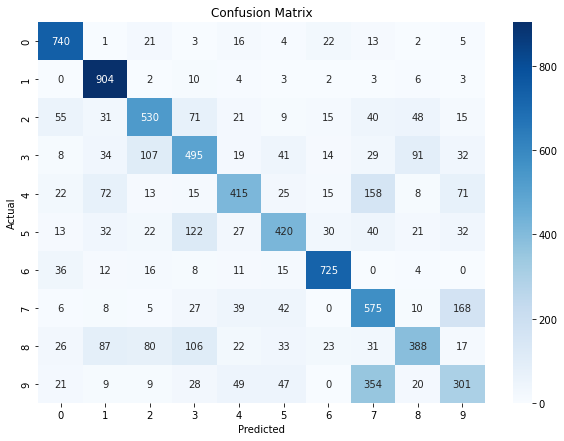

In [80]:
# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Hyperparameter

In [81]:
# --- KNN Model with Hyperparameter Tuning ---
param_grid = {'n_neighbors': np.arange(1, 21)}

# Perform Grid Search with Cross-Validation to find the best k
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best KNN model after hyperparameter tuning
best_knn = grid_search.best_estimator_

In [82]:
# Train the best KNN model
best_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = best_knn.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"KNN Model Accuracy: {accuracy_knn:.2f}")
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Model Accuracy: 0.66

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       827
           1       0.77      0.97      0.86       937
           2       0.66      0.63      0.65       835
           3       0.56      0.58      0.57       870
           4       0.70      0.51      0.59       814
           5       0.67      0.54      0.60       759
           6       0.85      0.89      0.87       827
           7       0.47      0.66      0.55       880
           8       0.66      0.48      0.56       813
           9       0.46      0.38      0.42       838

    accuracy                           0.66      8400
   macro avg       0.66      0.65      0.65      8400
weighted avg       0.66      0.66      0.65      8400



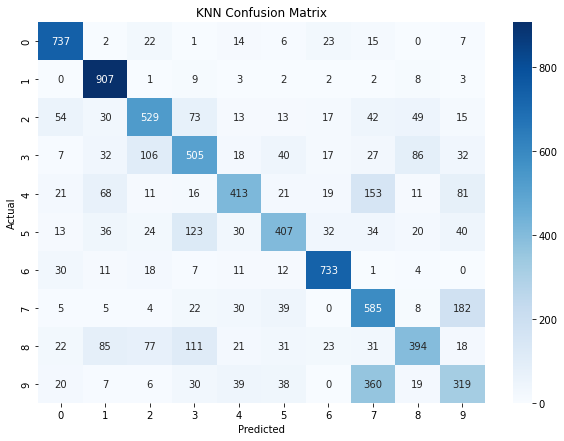

In [65]:
# Visualize the KNN confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Neural Network

In [91]:
# --- Neural Network Model ---
# Initialize and train a neural network classifier (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the neural network
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp.predict(X_test)

In [92]:
# Evaluate the neural network model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

print(f"\nNeural Network Model Accuracy: {accuracy_mlp:.2f}")
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp))


Neural Network Model Accuracy: 0.70

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       827
           1       0.88      0.94      0.91       937
           2       0.69      0.70      0.69       835
           3       0.62      0.60      0.61       870
           4       0.74      0.58      0.66       814
           5       0.66      0.65      0.66       759
           6       0.91      0.90      0.90       827
           7       0.50      0.64      0.56       880
           8       0.65      0.55      0.60       813
           9       0.47      0.48      0.48       838

    accuracy                           0.70      8400
   macro avg       0.70      0.69      0.69      8400
weighted avg       0.70      0.70      0.70      8400



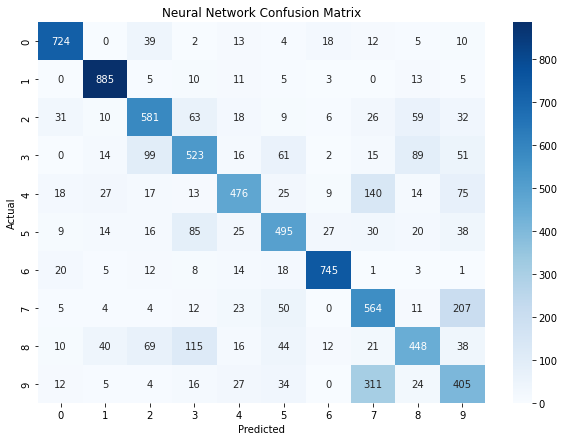

In [93]:
# Visualize the Neural Network confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()